<a href="https://colab.research.google.com/github/Dzamora-210/EDA-Wine/blob/main/Wine_EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly
import geographiclib
import geopandas as gpd
import seaborn as sns

import CSV

In [4]:
df = pd.read_csv ("/content/winemag-data-130k-v2 2.csv")

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


EDA price x region, provance, country, taster, price

In [6]:
df2 = df[['price', 'region_2', "country", 'taster_name', 'points', 'variety']].copy()

In [7]:
df2

,price,region_2,country,taster_name,points,variety
0,NaN,NaN,Italy,Kerin O’Keefe,87,White Blend
1,15.0,NaN,Portugal,Roger Voss,87,Portuguese Red
2,14.0,Willamette Valley,US,Paul Gregutt,87,Pinot Gris
3,13.0,NaN,US,Alexander Peartree,87,Riesling
4,65.0,Willamette Valley,US,Paul Gregutt,87,Pinot Noir
...,...,...,...,...,...,...
129966,28.0,NaN,Germany,Anna Lee C. Iijima,90,Riesling
129967,75.0,Oregon Other,US,Paul Gregutt,90,Pinot Noir
129968,30.0,NaN,France,Roger Voss,90,Gewürztraminer
129969,32.0,NaN,France,Roger Voss,90,Pinot Gris


In [8]:
counts = df2['country'].value_counts()
print(counts)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [9]:
df2 = df2[df2.groupby('country')['country'].transform('count').ge(1000)]
df2 = df2[df2.groupby('variety')['variety'].transform('count').ge(1000)]

df2

,price,region_2,country,taster_name,points,variety
0,NaN,NaN,Italy,Kerin O’Keefe,87,White Blend
1,15.0,NaN,Portugal,Roger Voss,87,Portuguese Red
2,14.0,Willamette Valley,US,Paul Gregutt,87,Pinot Gris
3,13.0,NaN,US,Alexander Peartree,87,Riesling
4,65.0,Willamette Valley,US,Paul Gregutt,87,Pinot Noir
...,...,...,...,...,...,...
129960,48.0,NaN,Portugal,Roger Voss,90,Pinot Noir
129965,28.0,NaN,France,Roger Voss,90,Pinot Gris
129966,28.0,NaN,Germany,Anna Lee C. Iijima,90,Riesling
129967,75.0,Oregon Other,US,Paul Gregutt,90,Pinot Noir


In [10]:
country_counts = df2['country'].value_counts()
print(counts)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [11]:
variety_counts = df['variety'].value_counts()
print(variety_counts)

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64


In [12]:
df['country'] = (df['country']).astype(str)
df['points'] = (df['points']).astype(int)

In [13]:
av_country = (df2.groupby("country").mean().round(2))

av_variety = (df2.groupby("variety").mean().round(2))

print(av_country)
print(av_variety)

              price  points
country                    
Argentina     25.27   86.81
Australia     29.07   87.97
Austria       31.30   90.31
Chile         20.66   86.48
France        43.14   88.86
Germany       43.13   90.01
Italy         46.29   88.95
New Zealand   26.97   88.31
Portugal      21.44   87.99
South Africa  25.52   88.22
Spain         28.16   87.23
US            37.64   88.63
                            price  points
variety                                  
Bordeaux-style Red Blend    47.24   89.10
Bordeaux-style White Blend  34.72   88.69
Cabernet Franc              34.69   88.15
Cabernet Sauvignon          48.33   88.62
Champagne Blend             70.98   89.68
Chardonnay                  34.67   88.35
Gamay                       20.70   88.03
Grüner Veltliner            27.80   89.98
Malbec                      29.94   87.98
Merlot                      29.70   87.21
Nebbiolo                    65.72   90.26
Pinot Grigio                16.68   86.23
Pinot Gris          

Correlations between Variables and Points

Country

In [46]:
df2['country'].corr(df2['points'])

0.01915060761578322

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average Points by Country')

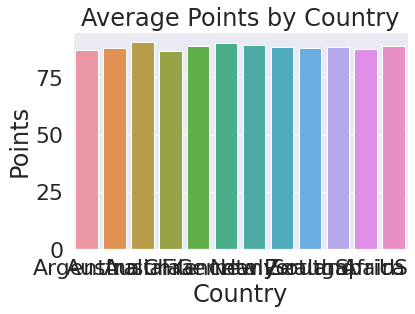

In [16]:
bar = df2.groupby('country', as_index=False)['points'].mean()

x = bar['country']
y= bar ['points']

sns.set(font_scale = 2)
sns.barplot(x, y, data=bar, ci=False)

plt.xlabel('Country')
plt.ylabel('Points')
plt.title('Average Points by Country')

Simolier

In [45]:
df2['taster_name'].corr(df2['points'])

0.07769401156818824

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average Points by Taster')

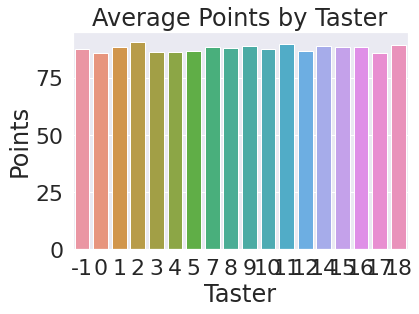

In [49]:
bar = df2.groupby('taster_name', as_index=False)['points'].mean()

x = bar['taster_name']
y= bar ['points']

sns.set(font_scale = 2)
sns.barplot(x, y, data=bar, ci=False)

plt.xlabel('Taster')
plt.ylabel('Points')
plt.title('Average Points by Taster')

Variety

In [44]:
df2['variety'].corr(df2['points'])

-0.04742127396521923

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average Points by Wine Variety')

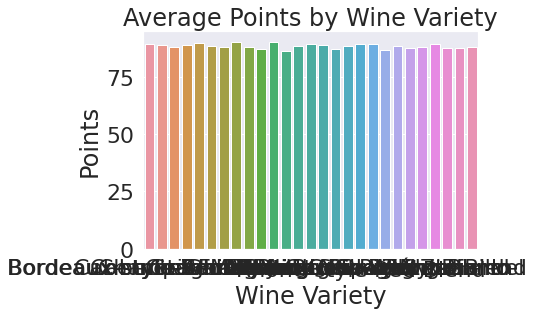

In [17]:
bar = df2.groupby('variety', as_index=False)['points'].mean()

x = bar['variety']
y= bar ['points']

sns.set(font_scale = 2)
sns.barplot(x, y, data=bar, ci=False)

plt.xlabel('Wine Variety')
plt.ylabel('Points')
plt.title('Average Points by Wine Variety')

Corelations w Price

Country

In [47]:
df2['country'].corr(df2['price'])

0.012763763605469117

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average Price by Country')

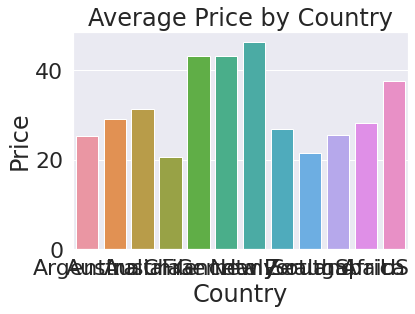

In [18]:
bar = df2.groupby('country', as_index=False)['price'].mean()

x = bar['country']
y= bar ['price']

sns.set(font_scale = 2)
sns.barplot(x, y, data=bar, ci=False)

plt.xlabel('Country')
plt.ylabel('Price')
plt.title('Average Price by Country')

Variety

In [48]:
df2['variety'].corr(df2['price'])

-0.09903456228877691

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average Price by Wine Varirty')

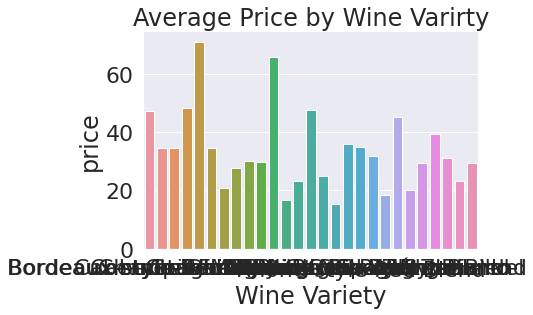

In [19]:
bar = df2.groupby('variety', as_index=False)['price'].mean()

x = bar['variety']
y = bar ['price']

sns.set(font_scale = 2)
sns.barplot(x, y, data=bar, ci=False)

plt.xlabel('Wine Variety')
plt.ylabel('price')
plt.title('Average Price by Wine Varirty')

In [43]:
df2['variety']=df['variety'].astype('category').cat.codes
df2['taster_name']=df['taster_name'].astype('category').cat.codes
df2['country']=df['country'].astype('category').cat.codes


Points

In [41]:
df2['price'].corr(df2['points'])

0.41622551716616696

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(75.0, 100.0)

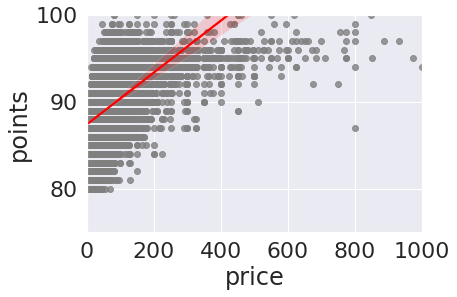

In [40]:
x = df2['price']
y = df2 ['points']

fig, ax = plt.subplots()
p = sns.regplot(x,y, data=df2, scatter_kws={"color": "grey"}, line_kws={"color": "red"})
ax.set_xlim(0,1000)
ax.set_ylim(75,100)
